# Машинное обучение (семинары)

### Урок 5. Оцениваем точность моделей с помощью разнообразных метрик

#### Домашние задание:

Используя набор данных о домах, примените метрики для оценки качества модели регрессии. Затем, используя набор данных об ирисах, примените метрики для оценки качества модели классификации.

Шаги для выполнения задания:

1. Загрузите набор данных о домах и набор данных об ирисах.

2. Разделите данные на обучающую и тестовую выборки.

3. Создайте модель регрессии и обучите ее на обучающей выборке.

4. Примените метрики для оценки качества модели регрессии на тестовой выборке.

5. Создайте модель классификации и обучите ее на обучающей выборке.

6. Примените метрики для оценки качества модели классификации на тестовой выборке.

Для того, чтобы загрузить наборы данных, используйте:


from sklearn import datasets
boston = datasets.load_boston()

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

##### 1. Загрузите набор данных о домах и набор данных об ирисах.

In [2]:
# DataFrame "boston" был удалён из библиотеки sklearn и код не работает, по этому была найдена его копия.
# from sklearn.datasets import load_boston
# data_boston = load_boston()

In [3]:
# Загрузка данных из файла
boston_df = pd.read_csv("boston.csv")

In [4]:
# # Скачиваем датасет
# from pathlib import Path
# import opendatasets as od

# dataset_path = Path('uciml/iris')
# # Проверяем существование директории с датасетом
# if not dataset_path.is_file():
#     od.download('https://www.kaggle.com/datasets/uciml/iris/data')

In [5]:
# Загрузка данных из файла
iris_df = pd.read_csv('iris/Iris.csv')

In [6]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Информация об атрибутах (по порядку):

CRIM - Уровень преступности на душу населения в разбивке по городам

ZN - Доля земель под жилую застройку, разделенных на участки площадью более 25 000 кв.футов

INDUS - Доля акров, не связанных с розничной торговлей, в штате Индиана в расчете на город

CHAS - Фиктивная переменная CHAS Charles River (= 1, если участок граничит с рекой; 0 в противном случае)

NOX - Концентрация оксидов азота NOX (частей на 10 миллионов)

RM - Среднее количество комнат в жилом помещении за год

AGE - ВОЗРАСТНАЯ доля квартир, занимаемых владельцами, построенных до 1940 года

DIS - Взвешенные расстояния до пяти бостонских центров занятости

RAD - Индекс доступности радиальных магистралей RAD

TAX - НАЛОГ на недвижимость по полной стоимости -ставка налога на 10 000 долларов США

PTRATIO - Соотношение количества учеников и учителей по городам

B - B 1000(Bk - 0,63)^2, где Bk - доля чернокожих в городе

LSTAT - На 1000 % ниже статус населения

MEDV - Средняя стоимость домов, занимаемых владельцами, в среднем на 1000 долларов

In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Из общей информации boston_df следует:
1. DataFrame содержит 506 записей (от индекса 0 до 505)
2. Всего 14 колонок
3. Нулевые значения отсуствуют
4. Нет пропущеных записей в колонках
5. Все колонки в float64 кроме RAD и CHAS которые содержит int64, типа object нету

In [8]:
# Статистический анализ числовых переменных
boston_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [9]:
duplicate_boston_df = boston_df[boston_df.duplicated()]
print("number of duplicate rows: ", duplicate_boston_df.shape)

number of duplicate rows:  (0, 14)


Дубликатов не обнаружено.

In [10]:
# Проверка на NaN значения
boston_df.isnull().any().any()

False

In [11]:
# Проверка на нулевые значения
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Пропущеных значений и NaN не обнаружено. 

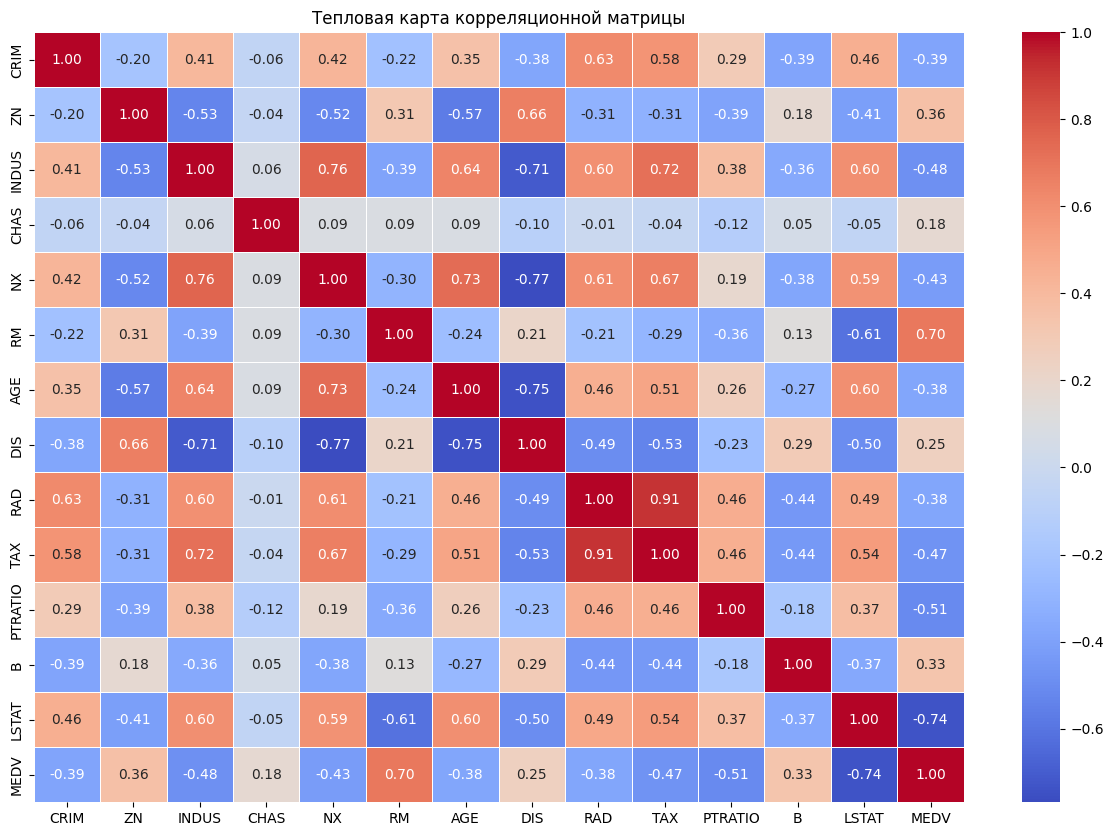

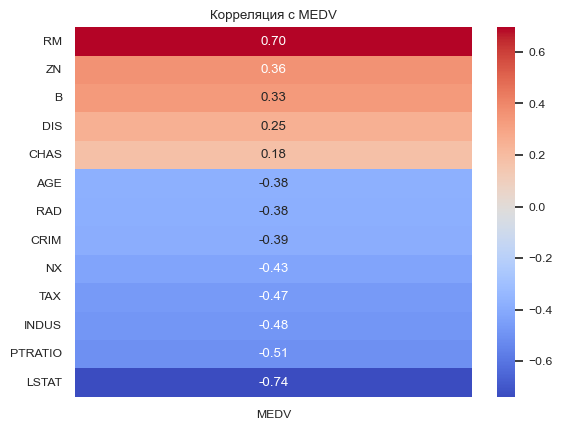

In [12]:
# Вычисляем корреляционную матрицу для обработанного DataFrame
correlation_matrix = boston_df.corr()

# Настраиваем размеры тепловой карты
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

# Вычисляем корреляцию между всеми переменными и сохраняем в переменной corr
corr = boston_df.corr()
target_corr = corr['MEDV'].drop('MEDV')

# Сортируем корреляции по убыванию
target_corr_sorted = target_corr.sort_values(ascending=False)

# Настраиваем параметры визуализации для тепловой карты
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция с MEDV')
plt.show()

In [13]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Информация об атрибутах (по порядку):

Id - Порядковый номер, индивидуальный индефикатор

SepalLengthCm - Длина чашелистика (sepal length) в сантиметрах

SepalWidthCm - Ширина чашелистика (sepal width) в сантиметрах

PetalLengthCm - Длина лепестка (petal length) в сантиметрах

PetalWidthCm - Ширина лепестка (petal width) в сантиметрах

Species - Вид/тип цветка

In [14]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Из общей информации iris_df следует:
1. DataFrame содержит 150 записей (от индекса 0 до 149)
2. Всего 6 колонок
3. Нулевые значения отсуствуют
4. Нет пропущеных записей в колонках
5. Все колонки в float64 кроме Species которая содержит object и колонки Id в которой хранится int64(Id будет удалена поскольку не несет никакой ценности для обучения модели)

In [15]:
# Статистический анализ числовых переменных
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [16]:
# Статистический анализ объектных переменных
iris_df.describe(include='object').T

,count,unique,top,freq
Species,150,3,Iris-setosa,50


In [17]:
duplicate_iris_df = iris_df[iris_df.duplicated()]
print("number of duplicate rows: ", duplicate_iris_df.shape)

number of duplicate rows:  (0, 6)


Дубликатов не обнаружено.

In [18]:
# Проверка на NaN значения
iris_df.isnull().any().any()

False

In [19]:
# Проверка на нулевые значения
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Пропущеных значений и NaN не обнаружено. 

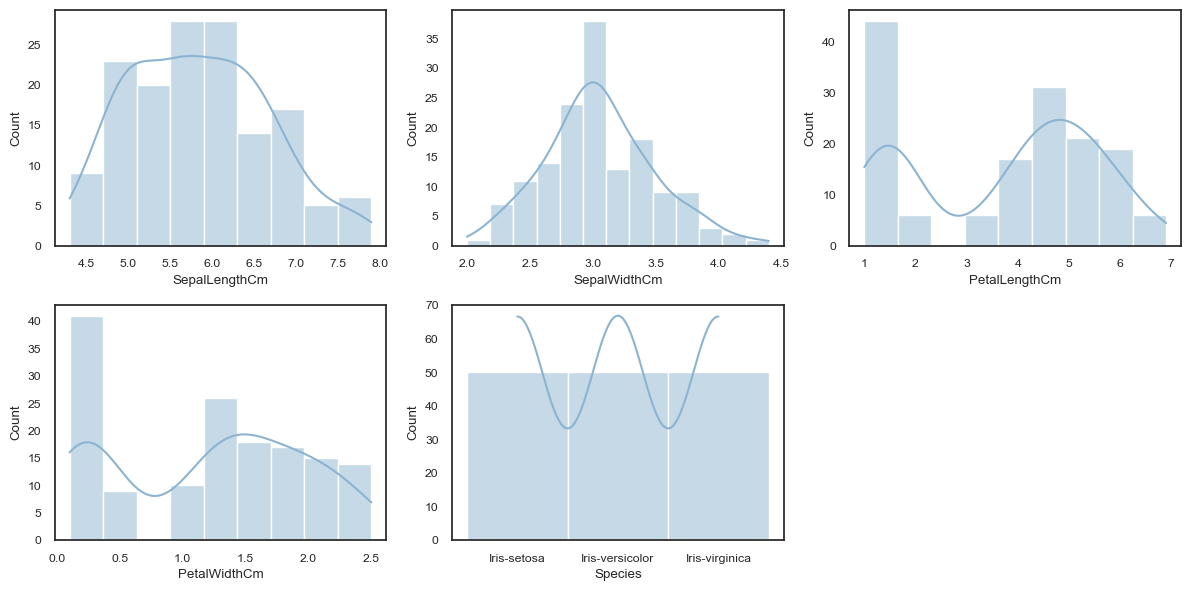

In [20]:
# Визуализация гистограмм
plt.figure(figsize=(12, 6))
for i, column in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(iris_df[column], kde=True)

plt.tight_layout()
plt.show()

In [21]:
# Подготавливаем столбец Species перед обученим модели
# Приводим обектные значения к интовым
mapDiag = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_df['Species'] = iris_df['Species'].map(mapDiag)

print(f"Кодировка", mapDiag)

Кодировка {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [22]:
# Проверяем тип чтобы удостовериться, что изменения прошли успешно
print(iris_df.dtypes['Species'])

int64


In [23]:
# Удаляем столбец Id поскольку он для работы нам не нужен
iris_df = iris_df.drop('Id', axis=1)

In [24]:
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
iris_df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

##### 2. Разделите данные на обучающую и тестовую выборки.

In [26]:
# DataFrame Boston
# Определение независимых и зависимых переменных
X_boston = boston_df.drop(["MEDV"], axis=1) # Независимые переменные
y_boston = boston_df['MEDV']  # Зависимая переменная

# Разделение данных на обучающую и тестовую выборки
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

# Выводим размеры
print("Размер обучающего набора boston:", X_train_boston.shape)
print("Размер тестового набора boston:", X_test_boston.shape)


Размер обучающего набора boston: (404, 13)
Размер тестового набора boston: (102, 13)


In [27]:
# DataFrame iris
# Определение независимых и зависимых переменных
X_iris = iris_df.drop(["Species"], axis=1) # Независимые переменные
y_iris = iris_df['Species']  # Зависимая переменная

# Разделение данных на обучающую и тестовую выборки
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Выводим размеры
print("Размер обучающего набора iris:", X_train_iris.shape)
print("Размер тестового набора: iris", X_test_iris.shape)

Размер обучающего набора iris: (120, 4)
Размер тестового набора: iris (30, 4)


##### 3. Создайте модель регрессии и обучите ее на обучающей выборке.

In [28]:
# DataFrame Boston
# Построение модели регрессии
model_linerReg_boston = LinearRegression()

# Обучение модели на обучающей выборке
model_linerReg_boston.fit(X_train_boston, y_train_boston)

LinearRegression()

In [29]:
# DataFrame iris
# Построение модели регрессии
model_linerReg_iris = LinearRegression()

# Обучение модели на обучающей выборке
model_linerReg_iris.fit(X_train_iris, y_train_iris)

LinearRegression()

##### 4. Примените метрики для оценки качества модели регрессии на тестовой выборке.

In [30]:
# DataFrame Boston
# Предсказание цен на тестовой выборке
y_pred_boston = model_linerReg_boston.predict(X_test_boston)

# Расчет метрик качества для бинарной классификации
mae_boston = mean_absolute_error(y_test_boston, y_pred_boston)
mse_boston = mean_squared_error(y_test_boston, y_pred_boston)
r2_boston = r2_score(y_test_boston, y_pred_boston)

# Оценка точности предсказаний
print('MAE на тестовой выборке:', mae_boston)
print('MSE на тестовой выборке:', mse_boston)
print('R2 на тестовой выборке:', r2_boston)


MAE на тестовой выборке: 3.1890919658878487
MSE на тестовой выборке: 24.291119474973545
R2 на тестовой выборке: 0.6687594935356316


Качество модели на тестовой выборке можно считать приемлемым, учитывая, что целевая переменная "MEDV" имеет большой диапазон значений и может быть подвержена значительным шумам. 

In [31]:
# DataFrame iris
# Предсказание цен на тестовой выборке
y_pred_iris = model_linerReg_iris.predict(X_test_iris)

# Расчет метрик качества для бинарной классификации
mae_iris = mean_absolute_error(y_test_iris, y_pred_iris)
mse_iris = mean_squared_error(y_test_iris, y_pred_iris)
r2_iris = r2_score(y_test_iris, y_pred_iris)

# Оценка точности предсказаний
print('MAE на тестовой выборке:', mae_iris)
print('MSE на тестовой выборке:', mse_iris)
print('R2 на тестовой выборке:', r2_iris)

MAE на тестовой выборке: 0.1466990776263419
MSE на тестовой выборке: 0.03723364456197505
R2 на тестовой выборке: 0.9467245149351708


Модель хорошо объясняет данные 94%, так же это звоночек, что либо данных слишком мало либо всё идёт к переобучению.

##### 5. Создайте модель классификации и обучите ее на обучающей выборке.

In [ ]:
# Выбираем колонки с выбросами по значениям
numerical_columns = ['ZN', 'AGE', 'TAX', 'B']

# Инициализация StandardScaler для стандартизации данных
scaler = StandardScaler()

# Масштабируем числовые переменные и преобразуем их в DataFrame
scaled_numerical = scaler.fit_transform(boston_df[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Удаление оригинальных числовых колонок из дамми-переменных
dummy_variables = boston_df.drop(numerical_columns, axis=1)

# Объединение дамми-переменных и масштабированных числовых переменных
boston_processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

In [39]:
# Преобразование целевой переменной "MEDV" в дискретную с помощью квантилей
q = boston_processed_df["MEDV"].quantile([0.25, 0.5, 0.75])
boston_processed_df["MEDV"] = pd.qcut(boston_processed_df["MEDV"], q=4, labels=False)

# Определение независимых и зависимых переменных
X_boston_obj = boston_processed_df.drop(["MEDV"], axis=1) # Независимые переменные
y_boston_obj = boston_processed_df['MEDV']  # Зависимая переменная

# Разделение данных на обучающую и тестовую выборки
X_train_boston_obj, X_test_boston_obj, y_train_boston_obj, y_test_boston_obj = train_test_split(X_boston_obj, y_boston_obj, test_size=0.2, random_state=42)

# Выводим размеры
print("Размер обучающего набора boston:", X_train_boston_obj.shape)
print("Размер тестового набора boston:", X_test_boston_obj.shape)

Размер обучающего набора boston: (404, 13)
Размер тестового набора boston: (102, 13)


In [40]:
# DataFrame Boston
# Построение модели классификации
model_RandForClass_boston = RandomForestClassifier()

# Обучение модели на обучающей выборке
model_RandForClass_boston.fit(X_train_boston_obj, y_train_boston_obj)

RandomForestClassifier()

In [41]:
# DataFrame iris
# Построение модели классификации
model_RandForClass_iris = RandomForestClassifier()

# Обучение модели на обучающей выборке
model_RandForClass_iris.fit(X_train_iris, y_train_iris)

RandomForestClassifier()

##### 6. Примените метрики для оценки качества модели классификации на тестовой выборке.

In [42]:
# DataFrame Boston
# Предсказание цен на тестовой выборке
y_pred_boston_obj = model_RandForClass_boston.predict(X_test_boston_obj)

# Расчет метрик качества для бинарной классификации
mae_boston_rand = mean_absolute_error(y_test_boston_obj, y_pred_boston_obj)
mse_boston_rand = mean_squared_error(y_test_boston_obj, y_pred_boston_obj)
r2_boston_rand = r2_score(y_test_boston_obj, y_pred_boston_obj)
accuracy_boston_rand = accuracy_score(y_test_boston_obj, y_pred_boston_obj)
confusion_boston_rand = confusion_matrix(y_test_boston_obj, y_pred_boston_obj)
report_boston_rand = classification_report(y_test_boston_obj, y_pred_boston_obj)

# Оценка точности предсказаний
print('MAE на тестовой выборке:', mae_boston_rand)
print('MSE на тестовой выборке:', mse_boston_rand)
print('R2 на тестовой выборке:', r2_boston_rand)
print("Точность:", accuracy_boston_rand)
print("Матрица путаницы:\n", confusion_boston_rand)
print("Отчет:", report_boston_rand)

MAE на тестовой выборке: 0.27450980392156865
MSE на тестовой выборке: 0.27450980392156865
R2 на тестовой выборке: 0.7484143763213531
Точность: 0.7254901960784313
Матрица путаницы:
 [[24  1  0  0]
 [ 7 19  9  0]
 [ 0  5 16  2]
 [ 0  0  4 15]]
Отчет:               precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.76      0.54      0.63        35
           2       0.55      0.70      0.62        23
           3       0.88      0.79      0.83        19

    accuracy                           0.73       102
   macro avg       0.74      0.75      0.73       102
weighted avg       0.74      0.73      0.72       102



К данной модели применен скалер для уравнивая значений и избавления от выбросов. Метрики показыают, что модель имеет хорошую производительность, R2 74% показывает, что модель хорошо объясняет данные. Точность модели равна 72% это весьма хороший уровень точности и по мимо этого это свидетельствует, что модель точно не переобучена.
Матрица ошибок:
- Класс 0: Высокая точность (24 верно классифицированных, 1 ошибочно).
- Класс 1: 19 верно классифицированных, но 7 ошибочно отнесены к классу 0.
- Класс 2: 16 верно классифицированных, но 5 ошибочно отнесены к классу 1 и 2 ошибочно к классу 3.
- Класс 3: Высокая точность (15 верно классифицированных, 4 ошибочно).

По отсчётности:
Precision модель имеет хорошие значения в обоих классах с разницей в единицу 0 = 77%, 1 = 76%.

Recall к сожалению модель имеет перекосс классов, 0 = 96%, 1 = 54%, что указывает на проблемы с индентификаей класса 1.

F1-Score Показывает не плохой баланс между Precision и Recall


In [44]:
# DataFrame iris
# Предсказание цен на тестовой выборке
y_pred_RandForClass_iris = model_RandForClass_iris.predict(X_test_iris)

# Расчет метрик качества для бинарной классификации
mae_iris_rand = mean_absolute_error(y_test_iris, y_pred_RandForClass_iris)
mse_iris_rand = mean_squared_error(y_test_iris, y_pred_RandForClass_iris)
r2_iris_rand = r2_score(y_test_iris, y_pred_RandForClass_iris)
accuracy_iris_rand = accuracy_score(y_test_iris, y_pred_RandForClass_iris)
confusion_iris_rand = confusion_matrix(y_test_iris, y_pred_RandForClass_iris)
report_iris_rand = classification_report(y_test_iris, y_pred_RandForClass_iris)

# Оценка точности предсказаний
print('MAE на тестовой выборке:', mae_iris_rand)
print('MSE на тестовой выборке:', mse_iris_rand)
print('R2 на тестовой выборке:', r2_iris_rand)
print("Точность:", accuracy_iris_rand)
print("Матрица путаницы:\n", confusion_iris_rand)
print("Отчет:", report_iris_rand)

MAE на тестовой выборке: 0.0
MSE на тестовой выборке: 0.0
R2 на тестовой выборке: 1.0
Точность: 1.0
Матрица путаницы:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Отчет:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Идеальные результаты могут означать, что модель была слишком приспособлена к данным обучающей выборки и скорее всего это могло привести к переобучению модели. Тем не менее, эти результаты показывают, что модель работает идеально на тестовой выборке.